# Project : Investigate a TMDB Movie Dataset 

# Analyzed by Muluneh Abrham

<a href ="#back-to-top"></a>
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB) [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub). The information includes some basic information about the movie like the title, cast, and director, and other relevant statistics such as popularity, budget, and revenue. In this report, the data analysis process will be used to answer the following questions:


**.What kinds of properties are associated with movies that have high revenues?**

**.Which genres are most popular from year to year?**

This report will use some libaries of Python including Numpy, Pandas, and Matplotlib. The import statement of these libraries is stated below:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


[<a id="back-to-top">Back to top</a>]

<a id='wrangling'></a>
## **Data Wrangling**

### **General Properties**

#### First ,load the CSV dataset and see the first few row 

In [51]:
# Read the data from the csv file
df_film = pd.read_csv('Database_TMDb_movie_data.csv')

In [52]:
# Exploring the dataset 
df_film.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [53]:
# Explore the shape of the dataset
df_film.shape

(10866, 21)

In [54]:
# Explore the null values of each raw
df_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**This dataset Containg the data type of int,(object) and float.Some columns contain null values,so this dataset needs data cleaning**

In [55]:
# Sum the null values 
df_film.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 Data Cleaning:Clean the row with null values 

In [56]:
# Remove rows with null value
df_film.dropna(inplace = True)

In [49]:
# Exploring the basic info for each column
df_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   budget                9773 non-null   int64  
 2   revenue               9773 non-null   int64  
 3   original_title        9773 non-null   object 
 4   cast                  9773 non-null   object 
 5   director              9773 non-null   object 
 6   runtime               9773 non-null   int64  
 7   genres                9773 non-null   object 
 8   production_companies  9773 non-null   object 
 9   vote_count            9773 non-null   int64  
 10  vote_average          9773 non-null   float64
 11  release_year          9773 non-null   int64  
 12  budget_adj            9773 non-null   float64
 13  revenue_adj           9773 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [57]:
# Exploring the data types after the cleaning 
df_film.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [59]:
# Exploring the shape of the dataset
df_film.shape

(1992, 21)

In [61]:
# Ilustrate few row of the dataset
df_film.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [62]:
# Explore the columns 
df_film.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [63]:
# list the irrelavant columns
columns_list = ['id','imdb_id','homepage','tagline','keywords','overview','release_date']

In [64]:
# Drop the irrelevant column_list
df_film.drop(columns_list,axis=1,inplace=True)

In [65]:
# Explore the new dataset shape
df_film.shape

(1992, 14)

In [224]:
# Explore the first few datasets.
df_film.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_data
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,2010s
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08,2010s
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,2010s
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09,2010s


 <a id='eda'></a>
# **Exploratory Data Analysis**

## 1.*What kinds of properties are associated with movies that have high  revenues*

In [74]:
# To analyze this lets explor the revenue
df_film.revenue.describe()

count    1.992000e+03
mean     1.152153e+08
std      2.202887e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.578782e+07
75%      1.278787e+08
max      2.781506e+09
Name: revenue, dtype: float64

<AxesSubplot:>

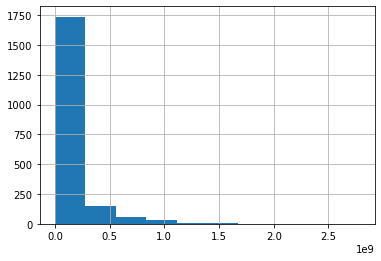

In [76]:
# let see the hist graph for revenu
df_film.revenue.hist()

The change of revenue over the year and the distribution of thr revenu are shown below

Text(0, 0.5, 'Revenue')

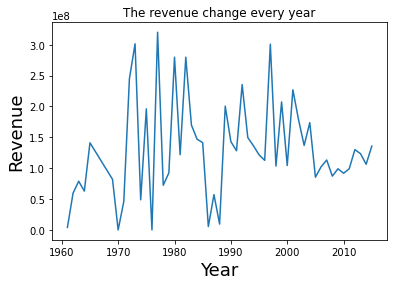

In [80]:
plt.plot(df_film.groupby('release_year')['revenue'].mean())
plt.title("The revenue change every year")
plt.xlabel("Year",fontsize =18)
plt.ylabel("Revenue",fontsize =18)

From the line chart above the revenue is changed over the years but in the last decades the revenue is decreassing. before come up to the conclusion lets see in different years.

In [85]:
# Let's use the aggrigate functions to see in diffent forms
new_edges = [1960,1970,1980,1990,2000,2010,2020]
new_name = ['1960s','1970s','1980s','1990s','2000s','2010s']
df_film['new_data'] = pd.cut(df_film['release_year'],new_edges,labels = new_name)

In [86]:
df_film.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_data
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,2010s
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08,2010s
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,2010s
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09,2010s


In [87]:
# Let"s the new_date in bar chart to compare its revenu in diffenernt decades 
revenu_deca = df_film.groupby('new_data').revenue.mean()

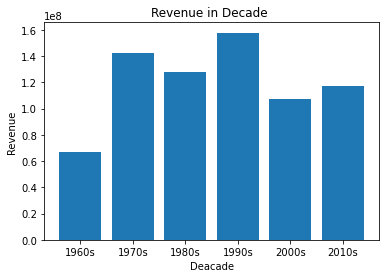

In [88]:
plt.bar(revenu_deca.index,revenu_deca.values)
plt.title("Revenue in Decade ")
plt.xlabel("Deacade")
plt.ylabel("Revenue")
plt.show()

From the bar chart above the revenu in 1990 is the most and 1960 is the least revenue

Next, we need to find the pattern of the high revenue. To order to discover the pattern of the group of high revenues, it is defined that the high revenue is the revenue above the 75% percentile.

In [91]:
# Extract the high revenue dataframe
h_revenue = df_film.revenue.quantile(.75)
h_rev_df = df_film[df_film.revenue > h_revenue]
h_rev_df.revenue.describe()

count    4.980000e+02
mean     3.878879e+08
std      3.025634e+08
min      1.279066e+08
25%      1.833948e+08
50%      2.884419e+08
75%      4.845319e+08
max      2.781506e+09
Name: revenue, dtype: float64

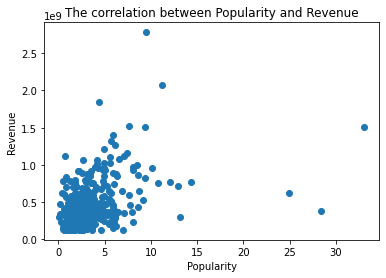

In [93]:
# plot the scatterplot of the popularity and revenue
plt.scatter(x=h_rev_df.popularity, y=h_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [100]:
# Let see the correlation between 'popularity' and 'revenue'
round(h_rev_df[['popularity', 'revenue']].corr(),2)

,popularity,revenue
popularity,1.00,0.48
revenue,0.48,1.00


The correlation between these two variables is 0.48, a relatively high figure. Then, the relationship of 'revenue' and 'vote_average' will be discovered.

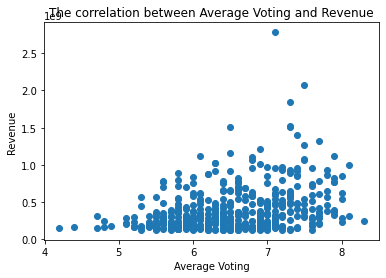

In [97]:
# plot in scatterplot of the vote_average and revenue
plt.scatter(x=h_rev_df.vote_average, y=h_rev_df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [98]:
# Let see the correlation between 'popularity' and 'revenue'
round(h_rev_df[['vote_average', 'revenue']].corr(),2)

,vote_average,revenue
vote_average,1.00,0.34
revenue,0.34,1.00


It shows that the correlation between 'vote_average' and 'revenue' is 0.34. The correlation is relatively low. The third group is 'budget' and 'revenue'.

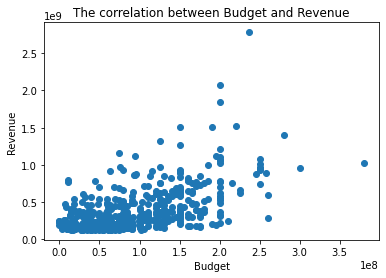

In [101]:
# plot in scatterplot of the budget and revenue
plt.scatter(x=h_rev_df.budget, y=h_rev_df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [104]:
# lets see  the correlation between 'vote_average' and 'revenue'
round(h_rev_df[['budget', 'revenue']].corr(),2)

,budget,revenue
budget,1.00,0.57
revenue,0.57,1.00


The correlation of 0.57is relatively high for these two variables.

In conclusion, for the high revenue group, the revenue is related to the 'popularity' and 'budget', and less related to 'vote_average'.

## **2.Which genres are most popular from year to year**

In [105]:
df_film.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_data
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,2010s
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955.5,2.716190e+08,2010s
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919.0,1.902723e+09,2010s
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923.1,1.385749e+09,2010s


In [112]:
df_film_genres = df_film[['release_year','genres','popularity']]

In [116]:
df_film_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


Split the '|' on the genres into different rows [source](https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe)

In [181]:
df_new = (df_film_genres.set_index(['release_year', 'popularity']).apply(lambda x: x.str.split('|').explode()).reset_index())        

In [173]:
df_new.head(30)

,release_year,popularity,genres
0,2015,32.985763,Action
1,2015,32.985763,Adventure
2,2015,32.985763,Science Fiction
3,2015,32.985763,Thriller
4,2015,28.419936,Action
5,2015,28.419936,Adventure
6,2015,28.419936,Science Fiction
7,2015,28.419936,Thriller
8,2015,13.112507,Adventure
9,2015,13.112507,Science Fiction


Now i need to select the most popular genres for each years [source](https://stackoverflow.com/questions/31361599/with-pandais-in-python-select-the-highest-value-row-for-each-group)

In [204]:
# Lets define a function for selectring the most poular 
def fun(group):
    return group.loc[group['popularity']== group['popularity'].max()]

In [205]:
# Calculate the mean popularity for each genres in each year
df_popular = df_new.groupby(['release_year','genres'],as_index = False).mean()

In [214]:
# Pick each year's  most popular genres 
df_max_pop = df_popular.groupby('release_year',as_index = False).apply(fun).reset_index(drop = True)

In [211]:
df_max_poular.head()

,release_year,genres,popularity
0,1961,Comedy,0.303783
1,1961,Family,0.303783
2,1962,Action,3.170651
3,1962,Adventure,3.170651
4,1962,Thriller,3.170651


Now let"s see the scatterplot is drawn to show the change of the most popular genre over the year.

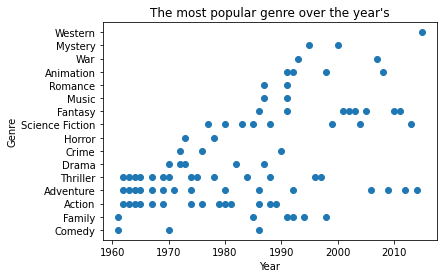

In [217]:
plt.scatter(df_max_pop.release_year, df_max_pop.genres)
plt.title("The most popular genre over the year's")
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

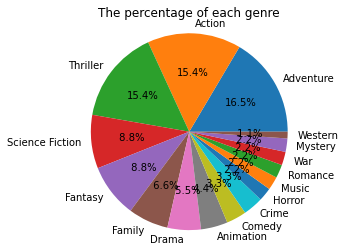

In [220]:
# Plote the pie chart of genres
sizes = df_max_pop.genres.value_counts().values
labels = df_max_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%4.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

From the pie chart, the 'Action', 'Adventure', and 'Thriller' tahes the majority of percentage over the year, while other genres like 'Western' and 'Mystery' are less frequent to become the most popular genre.

<a id='conclusions'></a>
# **Conclusion**

Based on all of the discovery above, some conclusions are drawn:
- The revenue changed not linear over the year"s. The 1960s accounts for the least, while the 1990s accounts for the most.
- The revenue of high revenue movie shows a strong positive correlation with budget and popularity, and a weak correlation with average voting. 
- The most popular genre of the movie changed over the year, although it shows the stability in some periods. Over the year, animation, fantasy, and adventure account for a large proportion of the most popular genre.

The limitation of this research is that there are so many data that have been cleaned in this report. These datas are seen as anomalies since they contains NaN, duplicates, or 0 in some or all columns. The amount of data changed from 10866 to 1992. The change is huge so that the results may not represent the population.

<a id='reference'></a>
# **Reference**

1.https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group


2.https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe